In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import pytorch_lightning as pl
from pathlib import Path
from image_model import Image_Dataloader, Image_Model
from audio_model import Audio_Dataloader, Audio_Model
from multimodal_model import Multimodal_Dataloader, Multimodal_Model
from pytorch_lightning.loggers import WandbLogger
import wandb

pl.seed_everything(42)


Seed set to 42


42

# Initialize dataloaders and individual modality models

In [2]:
path_to_data = Path("../../data/")
batch_size = 128

image_dataloader = Image_Dataloader(path_to_data=path_to_data, batch_size=batch_size)
audio_dataloader = Audio_Dataloader(path_to_data=path_to_data, batch_size=batch_size)
multimodal_dataloader = Multimodal_Dataloader(path_to_data=path_to_data, batch_size=batch_size)

image_model = Image_Model(num_classes=10)
audio_model = Audio_Model(num_classes=10, filters=[64, 128, 256], drop_rate=0.3)
multimodal_model = Multimodal_Model(num_classes=10)

# Train Image only model

In [3]:
# initialize logger and callbacks
wandb_logger = WandbLogger(project="NORA_MML_Exam", name="Image_Only_Model", log_model=True)

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="checkpoints", filename="image_model-{epoch:02d}-{val_loss:.2f}", monitor="val_loss", mode="min", save_top_k=1)

early_stopping_callback = pl.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [4]:
# initialize trainer
trainer = pl.Trainer(max_epochs=30, accelerator="mps", devices=1, logger=wandb_logger, callbacks=[checkpoint_callback, early_stopping_callback])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [5]:
# Train the model
trainer.fit(image_model, image_dataloader)

wandb: Currently logged in as: hzavadil98 to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/.venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/Exam/src/checkpoints exists and is not empty.

  | Name             | Type                      | Params | Mode 
-----------------------------------------------------------------------
0 | loss             | CrossEntropyLoss          | 0      | train
1 | accuracy         | MulticlassAccuracy        | 0      | train
2 | confusion_matrix | MulticlassConfusionMatrix | 0      | train
3 | model            | Conv2Net                  | 225 K  | train
-----------------------------------------------------------------------
225 K     Trainable params
0         Non-trainable params
225 K     Total params
0.900     Total estimated model params size (MB)
16        Modules in train mode
0         Modules in eval mode


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=30` reached.


In [6]:
# Test the model
image_model = Image_Model.load_from_checkpoint(checkpoint_callback.best_model_path)

trainer.test(image_model, image_dataloader)
wandb.finish()

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.8824031352996826
        test_loss           0.43682169914245605
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▁▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▃▅▁▆▆▅▅▆▆▅▅▅▅▇▅█▆▆▇▆▇▅▆▅▅█▇▅▇▇▇▇▆▇▇▆█▇▆▆
train_loss,▅▅▄▆▃▂▅▂▃▄▃▂▃▄▃▄▃▂▃▄▄▄▂█▃▂▂▁▂▂▃▂▃▃▃▄▃▂▃▄
trainer/global_step,▁▁▁▁▂▂▂▂▃▃▃▄▄▄▄▄▄▄▄▄▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇▇▇██
val_accuracy,▁▃▅▅▆▆▆▆▆▇▇▇▇▇▇██▇█▇█▇████████
val_loss,█▅▄▄▃▂▃▃▃▂▂▂▂▂▁▁▂▁▂▂▁▂▁▁▁▁▁▁▁▁
epoch,30
test_accuracy,0.8824
test_loss,0.43682


# Train Audio only model

In [ ]:
# initialize logger and callbacks
wandb_logger = WandbLogger(project="NORA_MML_Exam", name="Audio_Only_Model", log_model=True)

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="checkpoints", filename="audio_model-{epoch:02d}-{val_loss:.2f}", monitor="val_loss", mode="min", save_top_k=1)

early_stopping_callback = pl.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [6]:
# initialize trainer
trainer = pl.Trainer(max_epochs=30, accelerator="mps", devices=1, logger=wandb_logger, callbacks=[checkpoint_callback, early_stopping_callback])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [ ]:
# Train the model
trainer.fit(audio_model, audio_dataloader)

In [6]:
# Test the model
audio_model = Audio_Model.load_from_checkpoint(checkpoint_callback.best_model_path)

trainer.test(audio_model, audio_dataloader)

wandb.finish()

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.7153097987174988
        test_loss           0.9232636094093323
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▁▁▂▂▂▂▂▂▂▂▂▃▃▃▃▃▄▄▄▅▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▁▂▂▂▃▃▅▅▄▅▅▅▄▆▇▆▅▇▆▇▇▆▇▇▆▅▇▆▇█▆▅▇▇▇▇▇▇▇▇
train_loss,██▆▅▅▆▅▃▄▃▅▅▄▄▄▂▄▃▂▃▂▂▄▂▂▂▂▃▂▃▂▁▂▂▁▂▂▁▄▃
trainer/global_step,▁▁▁▂▂▂▂▂▃▃▃▃▃▃▃▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▆▇▇▇████
val_accuracy,▁▄▆▆▇▇▇█████
val_loss,█▄▂▂▂▁▁▂▂▂▂▃
epoch,12
test_accuracy,0.71531
test_loss,0.92326


# Train Multimodal model

In [11]:
# initialize logger and callbacks
wandb_logger = WandbLogger(project="NORA_MML_Exam", name="Multimodal_Model", log_model=True)

checkpoint_callback = pl.callbacks.ModelCheckpoint(dirpath="checkpoints", filename="multimodal_model-{epoch:02d}-{val_loss:.2f}", monitor="val_loss", mode="min", save_top_k=1)

early_stopping_callback = pl.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")

In [12]:
# initialize trainer
trainer = pl.Trainer(max_epochs=20, accelerator="mps", devices=1, logger=wandb_logger, callbacks=[checkpoint_callback, early_stopping_callback])

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


In [13]:
# Train the model
trainer.fit(multimodal_model, multimodal_dataloader)

/Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/.venv/lib/python3.12/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:658: Checkpoint directory /Users/jazav7774/Library/CloudStorage/OneDrive-UiTOffice365/UiT/NORA_MML/Exam/src/checkpoints exists and is not empty.

  | Name             | Type                      | Params | Mode 
-----------------------------------------------------------------------
0 | loss             | CrossEntropyLoss          | 0      | train
1 | accuracy         | MulticlassAccuracy        | 0      | train
2 | confusion_matrix | MulticlassConfusionMatrix | 0      | train
3 | image_model      | Conv2Net                  | 225 K  | train
4 | audio_model      | Conv1Net                  | 4.2 M  | train
5 | classifier       | Sequential                | 17.1 K | train
-----------------------------------------------------------------------
4.4 M     Trainable params
0         Non-trainable params
4.4 M     Total params
17.576    T

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

In [14]:
# Test the model
multimodal_model = Multimodal_Model.load_from_checkpoint(checkpoint_callback.best_model_path)

trainer.test(multimodal_model, multimodal_dataloader)
wandb.finish()

Testing: |          | 0/? [00:00<?, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
      test_accuracy         0.9368492960929871
        test_loss           0.2882814109325409
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


wandb: ERROR The nbformat package was not found. It is required to save notebook history.


epoch,▁▁▁▁▁▂▂▂▂▂▂▃▃▃▃▃▄▄▄▄▅▅▅▅▅▅▅▆▆▆▆▇▇▇▇▇▇▇▇█
test_accuracy,▁
test_loss,▁
train_accuracy,▃▅▅▄▅▅▅▅▅▅▁▆▄▆▄▅▅▄▇▆▄▅▅█▇▇▆▆▆▄▂▅▆▅▆▇▅█▆▇
train_loss,▃▂▂▃▂▂▂▂▂▂▂▂▂▃▂▂▁▁▂█▂▂▂▁▂▁▂▂▁▁▁▁▂▂▂▂▁▂▁▁
trainer/global_step,▁▁▁▂▂▂▂▃▃▃▃▃▃▄▄▄▄▄▄▄▅▅▅▅▅▅▅▆▆▆▇▇▇▇▇▇████
val_accuracy,▂▅▁▄▄▇▆▇▆█
val_loss,█▃▆▆▁▁▅▄▃▂
epoch,10
test_accuracy,0.93685
test_loss,0.28828


In [13]:
tr_dat = audio_dataloader.train_dataloader()

In [14]:
batch = next(iter(tr_dat))

In [15]:
batch[0].shape, batch[1].shape

(torch.Size([32, 1, 8000]), torch.Size([32]))

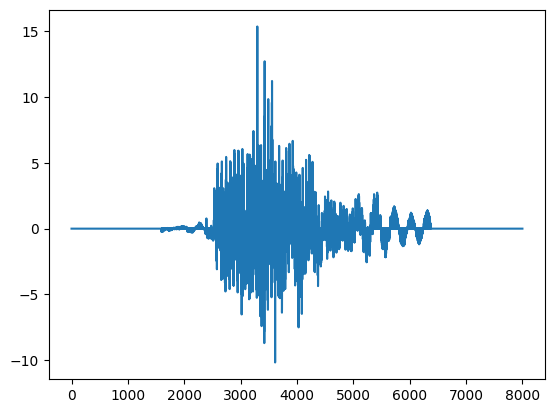

In [12]:
plt.plot(batch[0][0].numpy().T)